# PCA = Principal Component Analysis

In this practice you should apply PCA method to reduce dimensions for IRIS dataset.


<div>
    <img src="./../_images/svm_irises.png" width="800"/>
</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

To load Iris dataset there is no need to go directly to kaggle, etc. Now, almost every well-known dataset is presented in the frameworks out of the box. The same SKLearn does.

To get dataset simply use ```dataset``` package & do ```.load_``` of corresponding data.

In [3]:
iris = datasets.load_iris()

Lets investigate the given data

In [4]:
# first understand the type of the object:
print(type(iris))

# searching for "sklearn.utils.Bunch" navgates to https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html object description => hence this is just a key-value object
print(iris.keys())

# > dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In Python accessing values could be done in different way, e.g.:
```
> print(iris.data)
```
or by addressing property by name:
```
> print(iris["data"])
```

Note! property names are case-sensitive

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
# create a pandas dataframe based on the iris' data,
# note: we're adding target column separately, cause it is not in the data object

df = pd.DataFrame(iris.data, columns = iris.feature_names)
#df['target'] = iris.target
df['target'] = iris.target_names[iris.target]

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To visualize Iris dataset we'll be using Seaborn framework (just for instance), and it's feature ```pairplot```

<div>
    <img src="./../_images/pca.png" width="800"/>
</div>

## Standartize the data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

<div>
    <img src="./../_images/pca_scalers.png" width="400"/>
</div>

In [8]:
x = StandardScaler().fit_transform(iris.data)

## Investigate PCA

In [9]:
covar_matrix = PCA(n_components = 4) #we have 4 features

In [10]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 73. ,  95.9,  99.6, 100.1])

In the above array we see that the first feature explains roughly 73% of the variance within our data set while the first two explain 95.9 and so on.
If we employ 4 features we capture 100% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

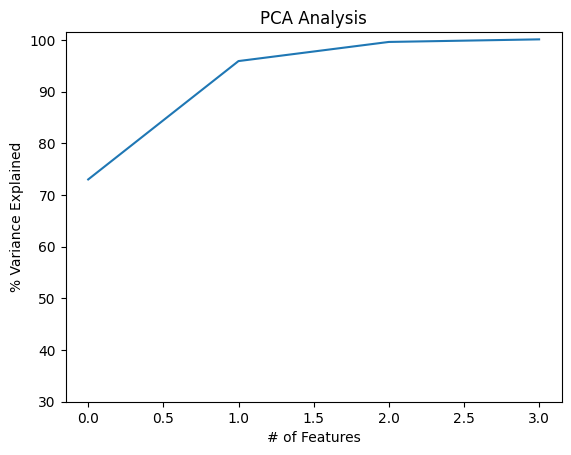

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,101.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

## PCA Projection to 2D

In [12]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(x)

In [14]:
df_principal = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

In [15]:
df_principal.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [16]:
df[['target']].head()

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [17]:
df_all = pd.concat([df_principal, df[['target']]], axis = 1)
df_all.head(5)

,principal component 1,principal component 2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

TASK

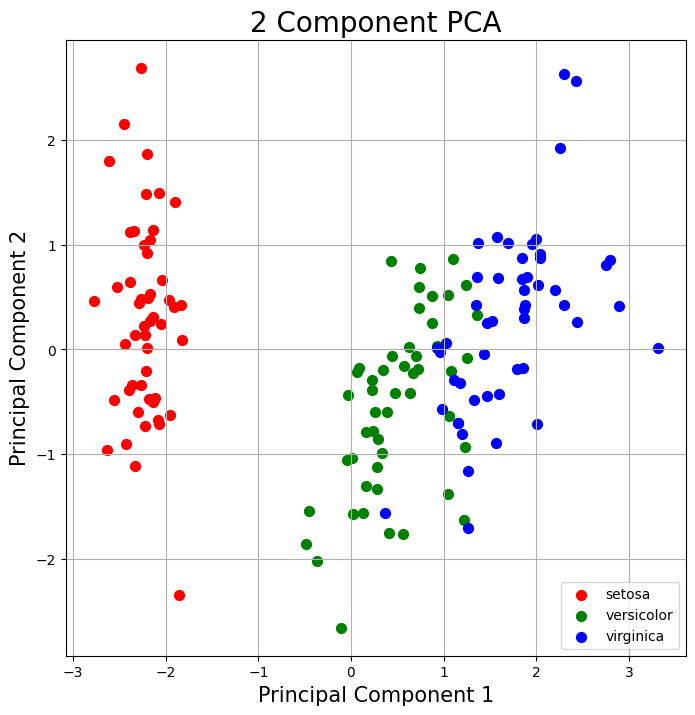

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = iris.target_names
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    ax.scatter(df_all.loc[indicesToKeep, 'principal component 1']
               , df_all.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Explained variance: 
[2.93808505 0.9201649 ]
PCA effect: 
[[ 0.89315091  0.3620387 ]
 [-0.46168423  0.88567345]
 [ 0.99487699  0.02349363]
 [ 0.96821173  0.06421425]]


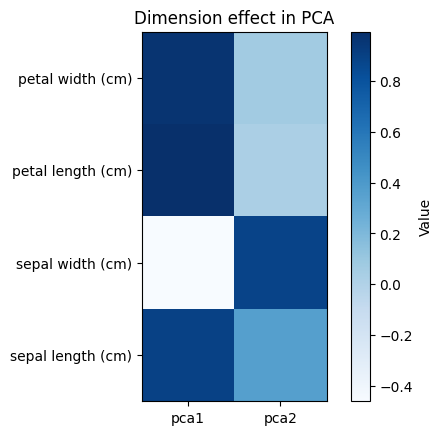

In [19]:
# оценим, какие размерности из исходного датасет наиболее близки к новым компонентам

print(f'Explained variance: \n{pca.explained_variance_}')

effect = pca.components_.T * np.sqrt(pca.explained_variance_)
print(f'PCA effect: \n{effect}')

plt.imshow(effect, cmap='Blues', origin='lower') # 'viridis' is a common colormap, 'origin' sets the (0,0) point

# Add a colorbar to interpret the colors
plt.colorbar(label='Value')

# Add titles and labels for clarity
plt.title('Dimension effect in PCA')
plt.xticks([0, 1], ['pca1', 'pca2'])
plt.yticks([0, 1, 2, 3], iris.feature_names)


# Display the plot
plt.show()


## PCA Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [20]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

## Applications of PCA?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (most common application). We will see this in the MNIST dataset.

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

## What are the limitations of PCA?

 - PCA is not scale invariant. check: we need to scale our data first.
 - The directions with largest variance are assumed to be of the most interest
 - Only considers orthogonal transformations (rotations) of the original variables
 - PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
 - If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

# Credits

1. https://etav.github.io/python/scikit_pca.html
2. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
3. https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
4. https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/geometric-explanation-of-pca
5. https://etav.github.io/python/scikit_pca.html
6. https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2799933550853697/3528939893150222/2202577924924539/latest.html
7.